#Experiment Evaluation

###Importing Libraries to prepare for Exporatory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns

In [ ]:
Clean_df = pd.read_csv('/content/drive/My Drive/Financial Metrics/Cleaned_Data.csv')
Clean_df = Clean_df.sort_values("YEAR")
Clean_df


,CUSTOMER_ID,TRANSACTION_PERIOD,REVENUE,CUSTOMER_TYPE,YEAR,PROFIT,IS_TREATMENT_FLAG
0,307,2015-03-31 00:00:00.000,50.47,Education,2015,10.68,NaN
3284,309,2015-03-31 00:00:00.000,112.04,Education,2015,27.83,NaN
3283,959,2015-09-30 00:00:00.000,82.57,Education,2015,27.91,NaN
3282,305,2015-03-31 00:00:00.000,128.99,Education,2015,23.98,NaN
3281,920,2015-03-31 00:00:00.000,81.08,Education,2015,43.22,NaN
...,...,...,...,...,...,...,...
104498,27501,2021-12-31 00:00:00.000,78.46,Education,2021,NaN,False
104499,27502,2021-12-31 00:00:00.000,124.41,Education,2021,NaN,True
104500,27503,2021-12-31 00:00:00.000,62.69,Education,2021,NaN,True
104494,27497,2021-12-31 00:00:00.000,108.36,Education,2021,NaN,False


In [ ]:
Clean_df.dtypes

CUSTOMER_ID             int64
TRANSACTION_PERIOD     object
REVENUE               float64
CUSTOMER_TYPE          object
YEAR                    int64
PROFIT                float64
IS_TREATMENT_FLAG      object
dtype: object

In [ ]:
#changing column types to correct types
Clean_df = Clean_df.astype({"CUSTOMER_ID": object, "YEAR": object})
Clean_df.dtypes

CUSTOMER_ID            object
TRANSACTION_PERIOD     object
REVENUE               float64
CUSTOMER_TYPE          object
YEAR                   object
PROFIT                float64
IS_TREATMENT_FLAG      object
dtype: object

In [ ]:
Clean_df1 = Clean_df.groupby('YEAR').sum().reset_index()
Clean_df1

,YEAR,REVENUE,PROFIT
0,2015,581446.00,171127.34
1,2016,1049612.87,320765.97
2,2017,1451557.62,525337.27
3,2018,2114484.91,711215.80
4,2019,2791129.12,1096964.53
5,2020,3014942.44,1041249.80
6,2021,2767067.63,0.00


#####Annual revenue decreases from 2020 to 2021 which makes it confusing how IP found a 15% increase in annual revenue.

#####Checking whether the difference between annual revenue of 2015 and 2021 shows a 15% increase.


In [ ]:
Final = Clean_df1.iloc[6]['REVENUE']
Initial = Clean_df1.iloc[0]['REVENUE']
((Final -Initial)*100)/Initial


375.89416765538573

#####Since this is a huge percentage increase, IP is definitely not talking about difference in annual revennue between 2015 and 2021.Lets remove rows from 2015-2020 as we do not need it for further exploration. Profit column will also be removed as they are all empty cells.

In [ ]:
Clean_df2 = Clean_df[(Clean_df['YEAR'] == 2021)]
Clean_df2 = Clean_df2.drop(columns = ["PROFIT","YEAR"])
Clean_df2

,CUSTOMER_ID,TRANSACTION_PERIOD,REVENUE,CUSTOMER_TYPE,IS_TREATMENT_FLAG
116150,1451,2021-03-31 00:00:00.000,326.28,Education,False
116141,5626,2021-03-31 00:00:00.000,84.84,Education,False
116147,21460,2021-03-31 00:00:00.000,66.61,Education,True
116143,21520,2021-03-31 00:00:00.000,98.41,Education,False
116144,21598,2021-03-31 00:00:00.000,65.20,Tech,True
...,...,...,...,...,...
104498,27501,2021-12-31 00:00:00.000,78.46,Education,False
104499,27502,2021-12-31 00:00:00.000,124.41,Education,True
104500,27503,2021-12-31 00:00:00.000,62.69,Education,True
104494,27497,2021-12-31 00:00:00.000,108.36,Education,False


#####The distribution of participants in the control and experimental group should be random. Since IP used REVENUE and CUSTOMER_TYPE to test their model, lets check whether there is any disparity in revenue range and customer types biasedness in the two groups.

In [ ]:
Clean_df3 = Clean_df2.groupby(['CUSTOMER_TYPE','IS_TREATMENT_FLAG']).mean()
#Clean_df3 = Clean_df2.groupby(['CUSTOMER_TYPE']).sum()
Clean_df3


REVENUE
CUSTOMER_TYPE IS_TREATMENT_FLAG         
Education     False                79.48
              True                 79.50
Tech          False                78.75
              True                 78.55

[Text(0, 0.5, 'REVENUE_RANGE'), Text(0.5, 0, 'CUSTOMER_TYPE')]

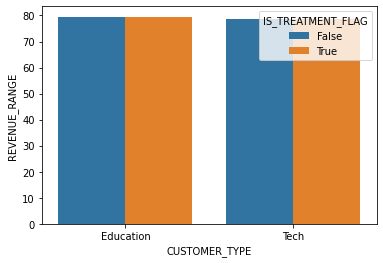

In [ ]:
F = sns.barplot(data=Clean_df3.reset_index(), x="CUSTOMER_TYPE", y="REVENUE", hue="IS_TREATMENT_FLAG")
F.set(xlabel='CUSTOMER_TYPE', ylabel='REVENUE_RANGE')

#####Revenue ranges seem to be equally set up for all groups. Lets check number of customers in all groups.

In [ ]:
Clean_df4 = Clean_df2.groupby(['CUSTOMER_TYPE','IS_TREATMENT_FLAG']).count()
Clean_df4

CUSTOMER_ID  TRANSACTION_PERIOD  REVENUE
CUSTOMER_TYPE IS_TREATMENT_FLAG                                          
Education     False                    11436               11436    11436
              True                     11813               11813    11813
Tech          False                     5944                5944     5944
              True                      5741                5741     5741

[Text(0, 0.5, 'NUMBER_OF_CUSTOMERS'), Text(0.5, 0, 'CUSTOMER_TYPE')]

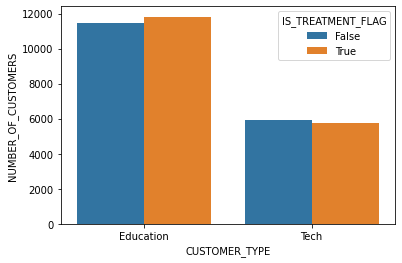

In [ ]:
fig = sns.barplot(data=Clean_df4.reset_index(), x="CUSTOMER_TYPE", y="CUSTOMER_ID", hue="IS_TREATMENT_FLAG")
fig.set(xlabel='CUSTOMER_TYPE', ylabel='NUMBER_OF_CUSTOMERS')

There is disparity between number of people in the Education and Tech sections but this is because most of IPs customers are from the Education Sector. Otherwise, within the sectors, the number of people in the True and False groups are evenly distributed.

#####Conclusion: With the columns used, the test is set up with no biasedness.

#####Lets check whether there is a 15% increase in revenue from the Test group compared to the control group.


In [ ]:
Clean_df5 = Clean_df2.groupby(['IS_TREATMENT_FLAG']).sum().reset_index()
Clean_df5


,IS_TREATMENT_FLAG,REVENUE
0,False,1376995.54
1,True,1390072.09


In [ ]:
F = Clean_df5.iloc[1]['REVENUE']
I = Clean_df5.iloc[0]['REVENUE']
((F -I)*100)/I

0.9496434811618462

#####The % difference is only 1%.

#####Lets check whether revenue increases from the start of the year to the end of the year by 15%.

In [ ]:
#changing data type for TRANSACTIO PERIOD to datetime format 
Clean_df2['TRANSACTION_PERIOD']= pd.to_datetime(Clean_df2['TRANSACTION_PERIOD'])
Clean_df2.dtypes

CUSTOMER_ID                   object
TRANSACTION_PERIOD    datetime64[ns]
REVENUE                      float64
CUSTOMER_TYPE                 object
IS_TREATMENT_FLAG             object
dtype: object

In [ ]:
#Extracting Month from it
Clean_df2['MONTH'] = Clean_df2['TRANSACTION_PERIOD'].dt.month
Clean_df2.head()

,CUSTOMER_ID,TRANSACTION_PERIOD,REVENUE,CUSTOMER_TYPE,IS_TREATMENT_FLAG,MONTH
116150,1451,2021-03-31,326.28,Education,False,3
116141,5626,2021-03-31,84.84,Education,False,3
116147,21460,2021-03-31,66.61,Education,True,3
116143,21520,2021-03-31,98.41,Education,False,3
116144,21598,2021-03-31,65.20,Tech,True,3


In [ ]:
Clean_df6 = Clean_df2.groupby(['MONTH','IS_TREATMENT_FLAG']).sum().reset_index()
Clean_df6

,MONTH,IS_TREATMENT_FLAG,REVENUE
0,3,False,368432.36
1,3,True,354768.46
2,6,False,355779.88
3,6,True,351365.13
4,9,False,334125.05
5,9,True,347946.76
6,12,False,318658.25
7,12,True,335991.73


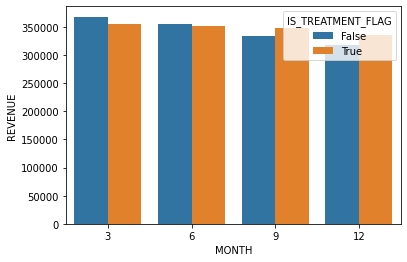

In [ ]:
sns.barplot(data=Clean_df6.reset_index(), x="MONTH", y="REVENUE", hue="IS_TREATMENT_FLAG")

#####Revenue decreased in both experiment and control group from the beginning of 2021 to the end of 2021.